<a href="https://colab.research.google.com/github/AhmedThahir/Attendance_Animation/blob/main/Attendance_Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from matplotlib.animation import FuncAnimation, writers

import seaborn as sns
sns.set_theme() # affects all matplotlib and seaborn plots
plt.style.use('ggplot')

In [25]:
def gsheet(spreadsheet_id, sheet_id=None, sheet_name=None):
    # make sure the spreadsheet is publicly viewable
    if sheet_id is not None:
        return f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/gviz/tq?tqx=out:csv&gid={sheet_id}"
    elif sheet_name is not None:
        return f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
    else:
        return None

df = pd.read_csv(gsheet("1BnzmkWo0EH8subvl_g7FQZ_6Nc8MaiA81gQ25HEfHM0", sheet_id=1763572421))
# attendance = pd.read_csv(gsheet("1BnzmkWo0EH8subvl_g7FQZ_6Nc8MaiA81gQ25HEfHM0", sheet_name = "Attendance_Animation"))
df = df[["Date", "Count", "Cumulative Count"]]

In [26]:
df = df.dropna()
df["Cumulative Count"] = df["Cumulative Count"].astype(int)
df

,Date,Count,Cumulative Count
0,Sep,44.0,44
1,Oct,74.0,118
2,Nov,35.0,153
3,Dec,47.0,200
4,Feb,89.0,289
5,Mar,49.0,338
6,Apr,81.0,419
7,May,55.0,474


In [27]:
# hyperparameters
x_values = list(range(1+df["Cumulative Count"].count()))
y_values = [0] + list(df["Cumulative Count"])
duration = 2 # seconds
pause_duration = 2 # seconds
res_w, res_h = 3000, 3000 # video_resolution
aspect_w, aspect_h = (7, 11) # aspect_ratio

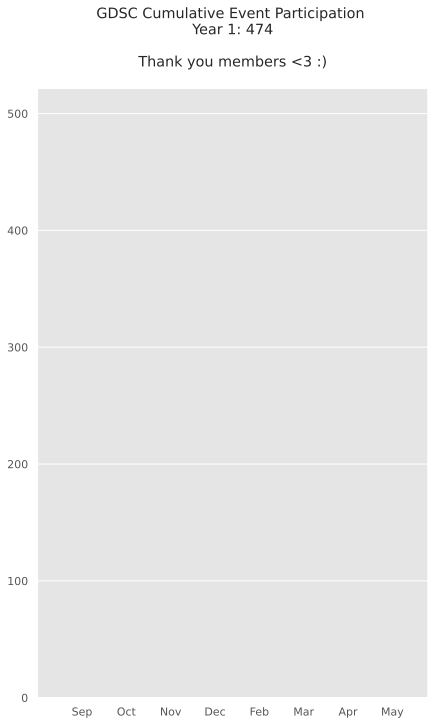

In [28]:
# plot
actual_no_of_frames = len(y_values)
fig = plt.figure(
    figsize = (aspect_w, aspect_h), # inches
    dpi = res_w/16 # 
)
plt.tight_layout()
ax = plt.gca()  # Get current axes
ax.set_title(f"GDSC Cumulative Event Participation \nYear 1: {max(y_values)}\n\nThank you members <3 :)\n")
ax.set_xlim(xmin=0, xmax=(len(y_values)-1)*1.1)
ax.set_ylim(ymin=0, ymax=max(y_values)*1.1)
ax.set_xticks(x_values, [""] + list(df["Date"]))
ax.grid(False, axis="x")
line, = ax.plot(0, 0, linewidth=3)

def animation_frame(i):
  # avoid changing axes, titles, etc in updates: low fps issue
  # ax.set_title(y_values[i])
  if i not in [0, 1] and i <= actual_no_of_frames:
    ax.text(x=i-1, y=y_values[i-1], s=y_values[i-1], backgroundcolor="white", size=10)
  line.set_xdata(x_values[:i])
  line.set_ydata(y_values[:i])

  return line, 

interval = (duration  * 1000)/actual_no_of_frames #ms
fps = 1000 / interval

no_of_blank_frames = int(fps * pause_duration)
total_no_of_frames = actual_no_of_frames + no_of_blank_frames

for _ in range(no_of_blank_frames):
  x_values.append(x_values[-1])
  y_values.append(y_values[-1])

In [29]:
# print(x_values)

animation = FuncAnimation(fig, func=animation_frame, frames=total_no_of_frames, interval=interval)

# setting up writer object
Writer = writers['ffmpeg']
writer = Writer(fps=fps, metadata={'artist': 'Me'}, bitrate=5000)

for txt in ax.texts:
    txt.set_visible(False)
animation.save('Attendance_Animation.mp4', writer)
for txt in ax.texts:
    txt.set_visible(False)
animation.save('Attendance_Animation.gif', writer)